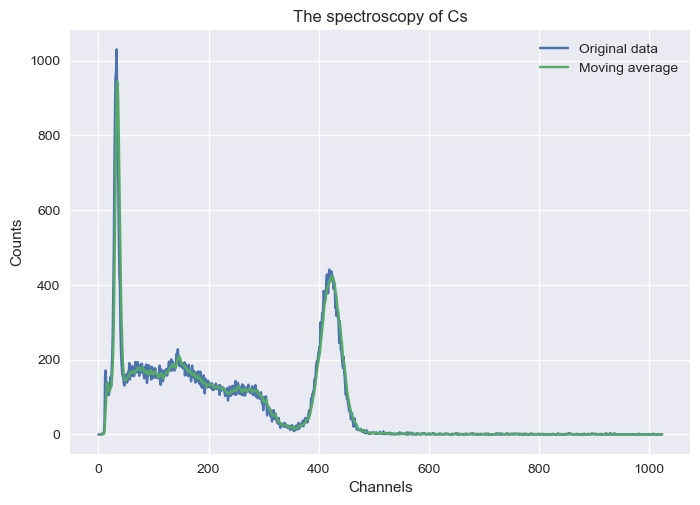

In [1]:
#Lets start the process of importing the data and the clearing of the 000 string
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress


with open('PGZ_CS.ASC', 'r') as f: #name of the file
    lines = f.readlines()

lines = lines[5:]

data = np.empty(())
for line in lines:
    values = line.strip().split(',')
    data = np.append(data,values)
data = np.char.replace(data, ' ', '')
data = data[1:]
data = data.astype(float)
#Now to make the channel and counts arrays
chan = np.empty(())
count = np.empty(())
spike_Cs = np.empty(())
spike_range_Cs = np.empty(())

chan = data[::2]
count = data[1::2]
for index in range(np.size(count)):
    count[index] = count[index]/1000 
    if (index>380 and index<490):
        spike_Cs = np.append(spike_Cs,count[index])
        spike_range_Cs = np.append(spike_range_Cs , index)
x = chan
y = count

# Calculate the moving average with a window of size 5
window_size = 5
moving_average = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Plot the original data and the moving average
plt.style.use('seaborn')
plt.plot(x, y, label='Original data')
plt.plot(x[window_size-1:], moving_average, label='Moving average')
plt.title('The spectroscopy of Cs')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Cs_spectroscopy.png')
plt.legend()
plt.show()


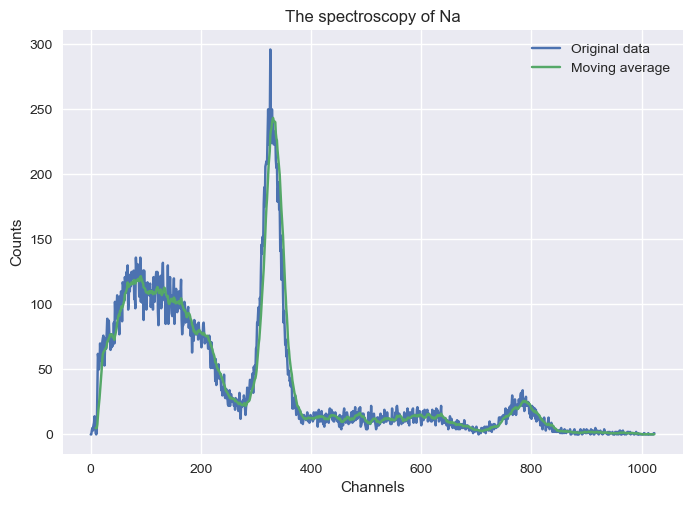

In [2]:
#Lets start the process of importing the data and clearing of the 000 string
import numpy as np
import matplotlib.pyplot as plt

with open('PGZ_NA.ASC', 'r') as f:
    lines = f.readlines()

lines = lines[5:]

data = np.empty(())
for line in lines:
    values = line.strip().split(',')
    data = np.append(data,values)
data = np.char.replace(data, ' ', '')
data = data[1:]
data = data.astype(float)
#Now to make the channel and counts arrays
chan = np.empty(())
count = np.empty(())
spike_Na = np.empty(())
spike_range_Na = np.empty(())
spike2_Na = np.empty(())
spike2_range_Na = np.empty(())

chan = data[::2]
count = data[1::2]
for index in range(np.size(count)):
    count[index] = count[index]/1000 
    if (index>280 and index<400):
        spike_Na = np.append(spike_Na,count[index])
        spike_range_Na = np.append(spike_range_Na,index)
    if (index>700 and index<900):
        spike2_Na = np.append(spike2_Na,count[index])
        spike2_range_Na = np.append(spike2_range_Na,index)

x = chan
y = count

# Calculate the moving average with a window of size 5
window_size = 10
moving_average = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Plot the original data and the moving average
plt.plot(x, y, label='Original data')
plt.plot(x[window_size-1:], moving_average, label='Moving average')
plt.title('The spectroscopy of Na')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.style.use('seaborn')
plt.savefig('Na_spectroscopy.png')
plt.legend()
plt.show()


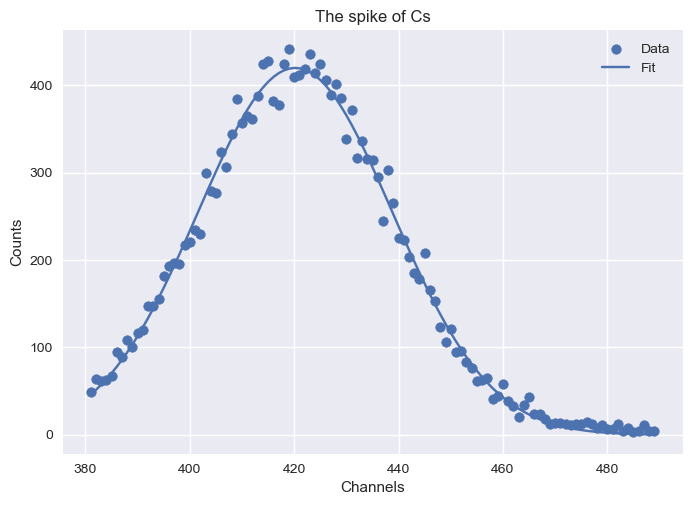

The amplitude is 419.90866785265393 with an error of 2.9829162502535813
The mean is 420.182249145738 with an error of 0.1528272038913267
The st_deviation is 18.633175432434086 with an error of 0.1570290110913196


In [3]:
#The first element is always (0,0) for some reason i'm too bored to fix
spike_range_Cs =spike_range_Cs[1:]
spike_Cs = spike_Cs[1:]

def gaussian(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

initial_guess = [450 , 420 , 5]
popt, pcov = curve_fit(gaussian, spike_range_Cs, spike_Cs,p0=initial_guess)


plt.scatter(spike_range_Cs, spike_Cs, label='Data')
plt.plot(spike_range_Cs, gaussian(spike_range_Cs, *popt), label='Fit')
plt.title('The spike of Cs')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Cs_spike.png')
plt.legend()
plt.show()
print('The amplitude is' , popt[0] , 'with an error of' ,math.sqrt(pcov[0][0]))
print('The mean is' , popt[1] , 'with an error of' ,math.sqrt(pcov[1][1]))
print('The st_deviation is' , popt[2] , 'with an error of' ,math.sqrt(pcov[2][2]))

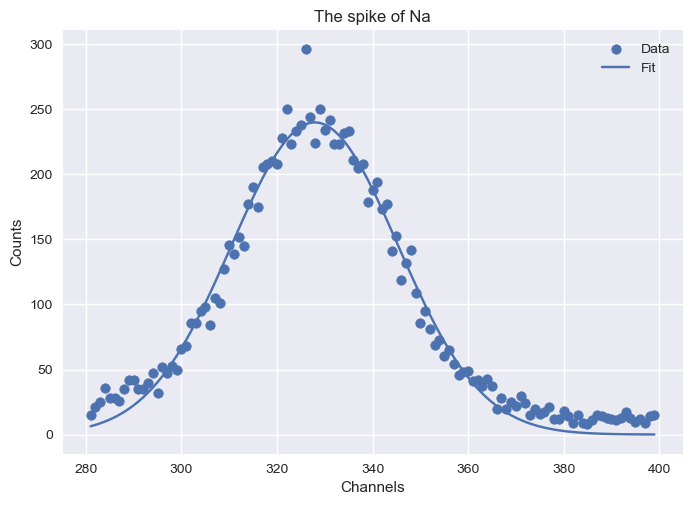

The amplitude is 239.983453358548 with an error of 2.8059558038969348
The mean is 327.9077934697624 with an error of 0.23505730060332844
The st_deviation is 17.418384658031087 with an error of 0.23581639591205958


In [4]:
spike_range_Na =spike_range_Na[1:]
spike_Na = spike_Na[1:]

initial_guess = [240 , 325 , 15]
popt, pcov = curve_fit(gaussian, spike_range_Na, spike_Na,p0=initial_guess)

plt.scatter(spike_range_Na, spike_Na, label='Data')
plt.plot(spike_range_Na, gaussian(spike_range_Na, *popt), label='Fit')
plt.title('The spike of Na')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Na_spike.png')
plt.legend()
plt.show()
print('The amplitude is' , popt[0] , 'with an error of' ,math.sqrt(pcov[0][0]))
print('The mean is' , popt[1] , 'with an error of' ,math.sqrt(pcov[1][1]))
print('The st_deviation is' , popt[2] , 'with an error of' ,math.sqrt(pcov[2][2]))

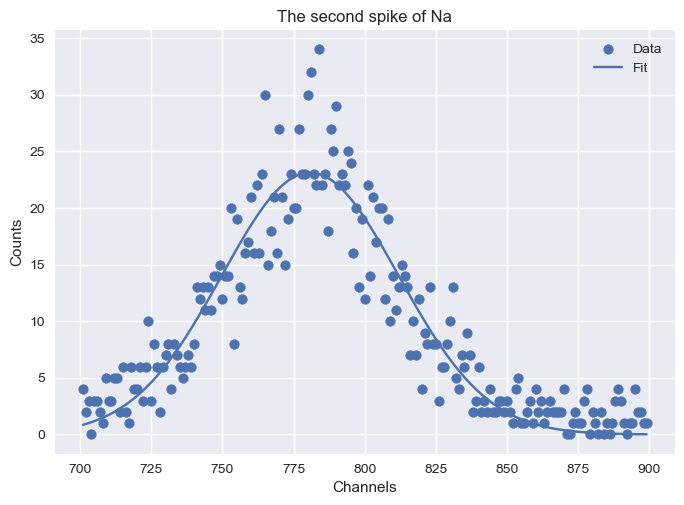

The amplitude is 23.117843484842382 with an error of 0.4915162323574773
The mean is 780.8118298979102 with an error of 0.7624163951871032
The st_deviation is 31.07676895789633 with an error of 0.7667833807394178


In [5]:
spike2_range_Na =spike2_range_Na[1:]
spike2_Na = spike2_Na[1:]


initial_guess = [35 , 775 , 15]
popt, pcov = curve_fit(gaussian, spike2_range_Na, spike2_Na,p0=initial_guess)


plt.scatter(spike2_range_Na, spike2_Na, label='Data')
plt.plot(spike2_range_Na, gaussian(spike2_range_Na, *popt), label='Fit')
plt.title('The second spike of Na')
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.savefig('Na_spike_2.png')
plt.legend()
plt.show()
print('The amplitude is' , popt[0] , 'with an error of' ,math.sqrt(pcov[0][0]))
print('The mean is' , popt[1] , 'with an error of' ,math.sqrt(pcov[1][1]))
print('The st_deviation is' , popt[2] , 'with an error of' ,math.sqrt(pcov[2][2]))

Slope:  1.6895355643757688
Intercept:  -45.3395872266525
R-squared:  0.9999562223380756


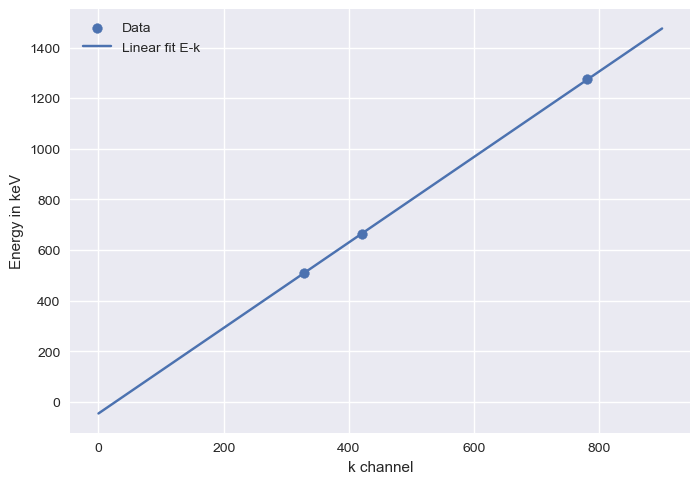

In [6]:
spike = np.array([420.182249145738,327.9077934697624 ,780.8323524773539])
real = np.array([661.65,511.,1274.5 ]) #keV
std_k = np.array([18.633175432434086,17.418384658031087,31.07676895789633])


slope, intercept, r_value, p_value, std_err = linregress(spike, real)

# Print the results
x = np.linspace(0,900,2)
def linfit(x):
    return slope*x+intercept
y = linfit(x)
pvalue = slope/intercept
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)
plt.scatter(spike ,real, label ='Data')
plt.plot(x,y, label='Linear fit E-k')
plt.legend(loc='upper left')
plt.xlabel('k channel')
plt.ylabel('Energy in keV')
plt.show()

In [7]:
#Calculate the precision
delta = np.empty(())
inv_sq_en = np.empty(3)
delta = (1*0.5887 *std_k)/(spike+pvalue)
energies = linfit(spike)
for index in range(np.size(energies)):
    inv_sq_en[index] = 1/(math.sqrt(energies[index]))
    
slope, intercept, r_value, p_value, std_err = linregress(inv_sq_en, delta)
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared: ", r_value**2)

Slope:  0.4489957133662799
Intercept:  0.01030342117925288
R-squared:  0.8732551774753253


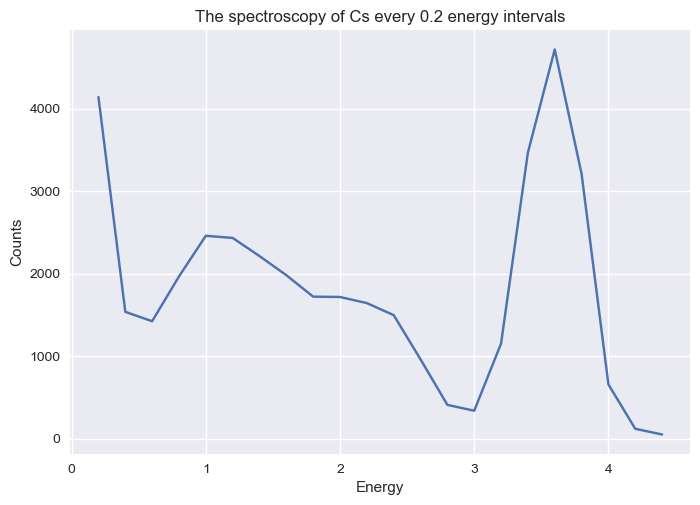

In [8]:
x_data = np.arange(0.2 , 4.6 , 0.2)
y_data = np.array([4141,1537,1423,1966,2459,2433,2213,1981,1721,1717,1643,1497,961,409,338,1152,3468,4718,3210,657,119,50])
plt.plot(x_data , y_data)
plt.title('The spectroscopy of Cs every 0.2 energy intervals')
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.savefig('Cs_spectroscopy_analogical.png')

In [9]:
from PIL import Image

img1 = Image.open("Cs_spike.png")
img2 = Image.open("Na_spike.png")
img3 = Image.open("Na_spike_2.png")
k = 500

img1 = img1.resize((k, k))
img2 = img2.resize((k, k))
img3 = img3.resize((k, k))


collage = Image.new('RGB', (2*k, 2*k),(255,255,255))

collage.paste(img1, (0, 0))
collage.paste(img2, (k, 0))
collage.paste(img3, (int(k/2), k))

collage.save("collage.png")
